In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
y_train[0]

1.0

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
from keras.api._v2.keras import activations
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')

])

In [16]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 54ms/step - loss: 0.5329 - accuracy: 0.7803 - val_loss: 0.4127 - val_accuracy: 0.8495
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3264 - accuracy: 0.8949 - val_loss: 0.3277 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2459 - accuracy: 0.9169 - val_loss: 0.2887 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1967 - accuracy: 0.9335 - val_loss: 0.3264 - val_accuracy: 0.8664
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1652 - accuracy: 0.9443 - val_loss: 0.2771 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1394 - accuracy: 0.9551 - val_loss: 0.2836 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1228 - accuracy: 0.9595 - val_loss: 0.2958 - val_accuracy: 0.8868
Epoch 8/20
30

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

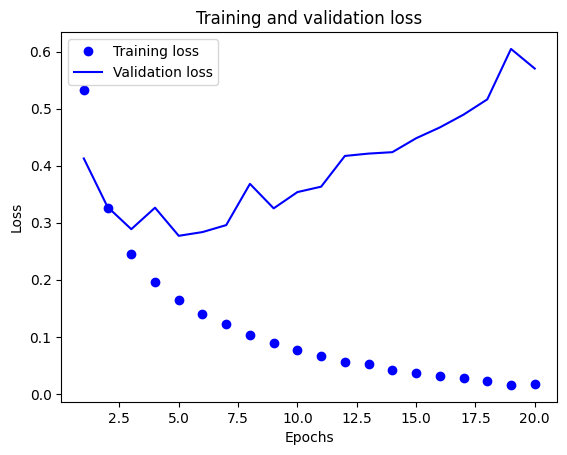

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

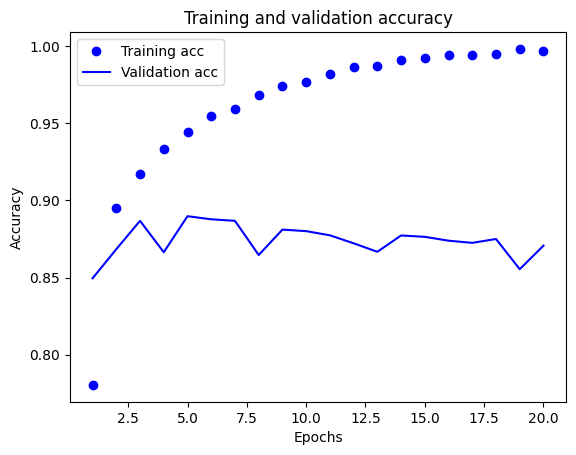

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6162 - accuracy: 0.8606


In [24]:
results

[0.61615389585495, 0.8605999946594238]

In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02709923],
       [0.9999999 ],
       [0.9927759 ],
       ...,
       [0.00413937],
       [0.02111001],
       [0.97074145]], dtype=float32)

In [31]:
model2=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')

])
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(partial_x_train,
  partial_y_train,
  epochs=30,
  batch_size=512,
  validation_data=(x_val, y_val))


Epoch 1/30
30/30 [==============================] - 3s 56ms/step - loss: 0.6015 - accuracy: 0.7100 - val_loss: 0.4835 - val_accuracy: 0.8493
Epoch 2/30
30/30 [==============================] - 1s 23ms/step - loss: 0.3942 - accuracy: 0.8753 - val_loss: 0.3562 - val_accuracy: 0.8742
Epoch 3/30
30/30 [==============================] - 1s 22ms/step - loss: 0.2855 - accuracy: 0.9075 - val_loss: 0.3014 - val_accuracy: 0.8826
Epoch 4/30
30/30 [==============================] - 1s 25ms/step - loss: 0.2241 - accuracy: 0.9252 - val_loss: 0.2801 - val_accuracy: 0.8868
Epoch 5/30
30/30 [==============================] - 1s 26ms/step - loss: 0.1843 - accuracy: 0.9385 - val_loss: 0.2881 - val_accuracy: 0.8848
Epoch 6/30
30/30 [==============================] - 1s 23ms/step - loss: 0.1539 - accuracy: 0.9487 - val_loss: 0.2831 - val_accuracy: 0.8862
Epoch 7/30
30/30 [==============================] - 1s 24ms/step - loss: 0.1312 - accuracy: 0.9571 - val_loss: 0.3005 - val_accuracy: 0.8837
Epoch 8/30
30

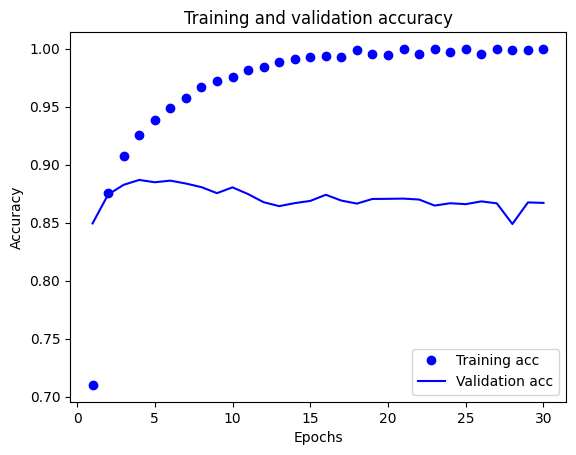

In [34]:
history_dict2 = history2.history
acc = history_dict2["accuracy"]
val_acc = history_dict2["val_accuracy"]
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()